# Project Name : Inventory Analysis Project

# Student Name : Kumar Manglam Gupta

### Objective

The objective of this project is to utilize data visualization techniques to extract and analyze key insights from an inventory analysis. By examining sales trends, product performance, and supplier contributions, this project aims to provide a comprehensive understanding of the inventory dynamics. These insights are crucial for making informed decisions regarding inventory analysis, supplier relationships, and sales strategies, ultimately contributing to the optimization of business operations.

### Purpose

The purpose of this project is to leverage data visualization techniques to gain insights into the inventory system. By analyzing sales trends, product performance, and supplier contributions, the project aims to:

- Identify key sales trends and patterns over time.
- Understand the performance of different product categories.
- Highlight top-performing products and suppliers.
- Analyze delivery times and customer ordering behavior.
- Provide a comprehensive view of the inventory status across categories.

### Columns description



- **ProductID	:**        Unique identifier for each product in the Products table.
- **ProductName :**     	The name of the product.
- **CategoryName :**	    The name of the category the product belongs to, fetched from the Categories table.
- **SupplierName :**	    The name of the supplier who provides the product, fetched from the Suppliers table.
- **ContactName :**	        The contact person at the supplier's company, fetched from the Suppliers table.
- **ContactEmail :**	    The email address of the supplier's contact person, fetched from the Suppliers table.
- **PhoneNumber	:**        The phone number of the supplier's contact person, fetched from the Suppliers table.
- **OrderID :**	            Unique identifier for each order, fetched from the Orders table.
- **OrderDate :**	        The date when the order was placed, fetched from the Orders table.
- **ShippingDate :**   	The date when the order was shipped, fetched from the Orders table.
- **TotalAmount :**	        The total monetary value of the order, fetched from the Orders table.
- **Quantity :**	        The number of units of the product ordered, fetched from the OrderDetails table.
- **UnitPrice :**	        The price per unit of the product at the time of the order, fetched from the OrderDetails table.
- **TotalPrice :**	        The total price for the product in the order (i.e., Quantity * UnitPrice), fetched from the OrderDetails table.

- **CustomerID :**	        Unique identifier for each customer, fetched from the Customers table.
- **FirstName :**	        The first name of the customer, fetched from the Customers table.
- **LastName :**	        The last name of the customer, fetched from the Customers table.
- **Email :**	            The email address of the customer, fetched from the Customers table.

### Installing required dependencies

%pip install mysql-connector-python

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Importing required libraries

In [3]:
# Example Python code for connecting to MySQL database using mysql-connector-python
import mysql.connector
#pandas for data manupulation
import pandas as pd
#numpy for numerical calculation
import numpy as np
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # data visualization

### Database Connectivity

In [4]:
# Database connection
connection = mysql.connector.connect(
    user='root',
    password='mysqlsql',
    host='localhost',
    database='Inventory'
)


#create a cursor object to execute SQL queries
cursor = connection.cursor()

### Query data from all the tables

In [5]:
# Query data from the 'customer' table
cursor.execute('SELECT * FROM Customers')
#After fetching data from the database we are storing it into pandas DataFrame
customers = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])


# Query data from the 'Categories' table
cursor.execute('SELECT * FROM Categories')
categories = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'OrderDetails' table
cursor.execute('SELECT * FROM OrderDetails')
order_details = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'Orders' table
cursor.execute('SELECT * FROM Orders')
orders = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'Products' table
cursor.execute('SELECT * FROM Products')
products = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'Suppliers' table
cursor.execute('SELECT * FROM Suppliers')
suppliers = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

print("Data ready for exploration")

Data ready for exploration


### Display first five rows from the 'customers'  table

In [6]:
#print the first five rows
customers.head()

,CustomerID,FirstName,LastName,Email,PhoneNumber,Address
0,1,Jiya,Agarwal,jiya.agarwal@example.com,+917454921023,H.No. 900\nBhatnagar Path\nAlwar-971180
1,2,Ivan,Sood,ivan.sood@example.com,02140809867,H.No. 88\nKorpal Street\nMotihari-056432
2,3,Zara,Datta,zara.datta@example.com,1341913071,40/80\nSwaminathan Circle\nKadapa-665539
3,4,Kaira,Bath,kaira.bath@example.com,0656131201,"82/849, Venkataraman Road\nBallia-024923"
4,5,Anahita,Lanka,anahita.lanka@example.com,0258895941,25/89\nSrivastava Ganj\nKharagpur-665752


### Display first five rows from the 'categories'  table

In [85]:
#print the first five rows
categories.head()

,CategoryID,CategoryName,Description,CreatedDate,UpdatedDate
0,1,Electronics,Devices and gadgets,2023-01-01,2023-01-03
1,2,Clothing,Apparel and accessories,2023-02-01,2023-02-03
2,3,Home Appliances,Household gadgets and appliances,2023-03-01,2023-03-03
3,4,Books,Printed and electronic books,2023-04-01,2023-04-03
4,5,Sports,Sports equipment and apparel,2023-05-01,2023-05-03


### Display first five rows from the 'order_details'  table

In [86]:
#print the first five rows
order_details.head()

,OrderDetailID,OrderID,ProductID,Quantity,UnitPrice,TotalPrice
0,1,8,28,3,4196.00,12588.00
1,2,43,3,4,7519.00,30076.00
2,3,65,52,5,1131.00,5655.00
3,4,89,49,8,8172.00,65376.00
4,5,77,2,7,7131.00,49917.00


### Display first five rows from the 'orders'  table

In [87]:
#print the first five rows
orders.head()

,OrderID,CustomerID,OrderDate,ShippingDate,ShippingAddress,TotalAmount
0,1,4,2023-12-18,2023-12-25,45/210\nDate Nagar\nDhule-267525,6310.00
1,2,99,2023-10-19,2023-10-20,"90, Bassi\nMuzaffarpur 146271",9397.00
2,3,62,2023-04-14,2023-04-16,"82/327, Vohra Ganj, Sirsa 832060",1412.00
3,4,45,2023-10-19,2023-10-25,"83\nBansal Marg, Malegaon-408618",9223.00
4,5,33,2023-12-18,2023-12-19,"133, Goswami Ganj, Naihati 113852",434.00


### Display first five rows from the 'products'  table

In [88]:
#print the first five rows
products.head()

,ProductID,ProductName,CategoryID,SupplierID,Price,StockQuantity,Description
0,1,iPhone 13,1,96,2828.00,836,From Apple Inc.
1,2,Ninja BL610,3,34,1067.00,76,High-speed blender from Ninja
2,3,Nike Strike,5,46,4379.00,931,Standard size football by Nike
3,4,The Great Gatsby,4,84,1798.00,691,Written by F. Scott Fitzgerald
4,5,Batman: Year One,4,93,7308.00,653,Popular superhero comic book by Frank Miller


### Display first five rows from the 'suppliers'  table

In [89]:
#print the first five rows
suppliers.head()

,SupplierID,SupplierName,ContactName,ContactEmail,PhoneNumber,Address
0,1,Shetty PLC,Adira Reddy,adira.reddy@Shetty.com,+916483149884,"35/147 Bassi Marg, Gulbarga-874018"
1,2,Chad-Gour,Miraan Aggarwal,miraan.aggarwal@Chad-Gour.com,3014105899,"81, Kata Chowk, Chittoor 998533"
2,3,Tank-Gulati,Vivaan Madan,vivaan.madan@Tank-Gulati.com,03855602659,"12, Saraf Circle, Nellore-358052"
3,4,Bhakta-Dua,Nayantara Bhattacharyya,nayantara.bhattacharyya@Bhakta-Dua.com,+918532154294,"587 Basak Path, Kanpur-131279"
4,5,Reddy Inc,Nirvaan Maharaj,nirvaan.maharaj@Reddy.com,05594211692,"90/18, Subramanian Zila, Jaunpur-121068"


# Data cleaning & Exploratory Data Analysis (EDA)

### customers

In [92]:
#print the shape of the customers table
customers.shape

(100, 6)

**Insights :** customers table consists of 100 rows and 6 columns

In [12]:
#Checking for null value
customers.isnull().sum()

CustomerID     0
FirstName      0
LastName       0
Email          0
PhoneNumber    0
Address        0
dtype: int64

**Insights :** There is no any null values present in customers data.

In [13]:
# This command is used get the number of non-null values and data type of the column.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   100 non-null    int64 
 1   FirstName    100 non-null    object
 2   LastName     100 non-null    object
 3   Email        100 non-null    object
 4   PhoneNumber  100 non-null    object
 5   Address      100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [14]:
#print the different columns of the dataset
customers.columns

Index(['CustomerID', 'FirstName', 'LastName', 'Email', 'PhoneNumber',
       'Address'],
      dtype='object')

In [15]:
#Removing duplicate values
print("Duplicate rows in customers:", customers.duplicated().sum())
customers.drop_duplicates(inplace=True)

Duplicate rows in customers: 0


### products

In [93]:
#print the shape of the products table
products.shape

(100, 7)

**Insights :** products table consists of 100 rows and 7 columns

In [17]:
#Checking for null value
products.isnull().sum()

ProductID        0
ProductName      0
CategoryID       0
SupplierID       0
Price            0
StockQuantity    0
Description      0
dtype: int64

**Insights :** There is no any null values present in products data.

In [18]:
# This command is used get the number of non-null values and data type of the column.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductID      100 non-null    int64 
 1   ProductName    100 non-null    object
 2   CategoryID     100 non-null    int64 
 3   SupplierID     100 non-null    int64 
 4   Price          100 non-null    object
 5   StockQuantity  100 non-null    int64 
 6   Description    100 non-null    object
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


In [19]:
#print the different columns of the dataset
products.columns

Index(['ProductID', 'ProductName', 'CategoryID', 'SupplierID', 'Price',
       'StockQuantity', 'Description'],
      dtype='object')

In [20]:
#Removing duplicate values
print("Duplicate rows in products:", products.duplicated().sum())
products.drop_duplicates(inplace=True)

Duplicate rows in products: 0


### order_details

In [94]:
#print the shape of the order_details table
order_details.shape

(100, 6)

**Insights :** order_details table consists of 100 rows and 6 columns

In [22]:
#Checking for null value
order_details.isnull().sum()

OrderDetailID    0
OrderID          0
ProductID        0
Quantity         0
UnitPrice        0
TotalPrice       0
dtype: int64

**Insights :** There is no any null values present in order_details data.

In [23]:
# This command is used get the number of non-null values and data type of the column.
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderDetailID  100 non-null    int64 
 1   OrderID        100 non-null    int64 
 2   ProductID      100 non-null    int64 
 3   Quantity       100 non-null    int64 
 4   UnitPrice      100 non-null    object
 5   TotalPrice     100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [24]:
#print the different columns of the dataset
order_details.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'Quantity', 'UnitPrice',
       'TotalPrice'],
      dtype='object')

In [25]:
#Removing duplicate values
print("Duplicate rows in order_details:", order_details.duplicated().sum())
order_details.drop_duplicates(inplace=True)

Duplicate rows in order_details: 0


### orders

In [96]:
#print the shape of the orders table
orders.shape

(100, 6)

**Insights :** orders table consists of 100 rows and 6 columns

In [27]:
#Checking for null value
orders.isnull().sum()

OrderID            0
CustomerID         0
OrderDate          0
ShippingDate       0
ShippingAddress    0
TotalAmount        0
dtype: int64

**Insights :** There is no any null values present in orders data.

In [28]:
# This command is used get the number of non-null values and data type of the column.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OrderID          100 non-null    int64 
 1   CustomerID       100 non-null    int64 
 2   OrderDate        100 non-null    object
 3   ShippingDate     100 non-null    object
 4   ShippingAddress  100 non-null    object
 5   TotalAmount      100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [29]:
#print the different columns of the dataset
orders.columns

Index(['OrderID', 'CustomerID', 'OrderDate', 'ShippingDate', 'ShippingAddress',
       'TotalAmount'],
      dtype='object')

In [30]:
#Removing duplicate values
print("Duplicate rows in orders:", orders.duplicated().sum())
orders.drop_duplicates(inplace=True)

Duplicate rows in orders: 0


### suppliers

In [98]:
#print the shape of the suppliers table
suppliers.shape

(100, 6)

**Insights :** suppliers table consists of 100 rows and 6 columns

In [32]:
#Checking for null value
suppliers.isnull().sum()

SupplierID      0
SupplierName    0
ContactName     0
ContactEmail    0
PhoneNumber     0
Address         0
dtype: int64

**Insights :** There is no any null values present in suppliers data.

In [33]:
# This command is used get the number of non-null values and data type of the column.
suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SupplierID    100 non-null    int64 
 1   SupplierName  100 non-null    object
 2   ContactName   100 non-null    object
 3   ContactEmail  100 non-null    object
 4   PhoneNumber   100 non-null    object
 5   Address       100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [34]:
#print the different columns of the dataset
suppliers.columns

Index(['SupplierID', 'SupplierName', 'ContactName', 'ContactEmail',
       'PhoneNumber', 'Address'],
      dtype='object')

In [35]:
#Removing duplicate values
print("Duplicate rows in suppliers:", suppliers.duplicated().sum())
suppliers.drop_duplicates(inplace=True)

Duplicate rows in suppliers: 0


### Products lists

In [68]:
print("The list of products are :")
unique_product_names = products['ProductName'].unique().tolist()
unique_product_names

The list of products are :


['iPhone 13',
 'Ninja BL610',
 'Nike Strike',
 'The Great Gatsby',
 'Batman: Year One',
 'Vivo V21',
 'How to Win Friends and Influence People',
 'Columbia Sun Hat',
 'Philips AC2887',
 'Dell XPS 13',
 'Bosch WAT28400UC',
 'Wilson Pro Staff RF97',
 'Lonely Planet: India',
 'Samsung RF28R7351SG',
 'Nike Windrunner',
 'Percy Jackson',
 'The Odyssey',
 'Panasonic NN-SN966S',
 'Adidas Ultraboost',
 'Physics Textbook',
 'Marvel Spidey',
 'Dyson V11',
 'Pixel 6',
 'Vogue',
 'Harry Potter',
 'MacBook Air',
 "Levi's 501",
 'Decathlon Yoga Mat',
 'Kookaburra Kahuna',
 'Cosco Football',
 'Sadhu: The Birth of the Warrior Paperback',
 'Sony WH-1000XM4',
 'Kindle Paperwhite',
 'Liforme Yoga Mat',
 'Realme 8',
 'OnePlus 9',
 'Shiva Trilogy',
 'Redmi Note 10',
 'Galaxy S21',
 'Wrogn Sneakers',
 'IFB Washing Machine',
 'Spalding NBA Indoor/Outdoor Basketball',
 'Preethi Mixer Grinder',
 'Steve Jobs',
 'Dune']

### Suppliers name

In [69]:
print("The list of suppliers are :")
unique_suppliers_names = suppliers['SupplierName'].unique().tolist()
unique_suppliers_names

The list of suppliers are :


['Shetty PLC',
 'Chad-Gour',
 'Tank-Gulati',
 'Bhakta-Dua',
 'Reddy Inc',
 'Khurana LLC',
 'Kara-Gaba',
 'Chahal Ltd',
 'Balakrishnan, Aggarwal and Buch',
 'Dada-Banik',
 'Salvi, Ghosh and Batra',
 'Dasgupta LLC',
 'Kothari-Badal',
 'Chhabra, Ray and Devi',
 'Barad-Chacko']

### Product's categories

In [73]:
print("The categories of the products are :")
categories_names = categories['CategoryName'].unique().tolist()
categories_names

The categories of the products are :


['Electronics', 'Clothing', 'Home Appliances', 'Books', 'Sports']

**Insights :** There are total five different categories of the products.

### Shipping address

In [75]:
print("The categories of the products are :")
shipping_address = orders['ShippingAddress'].unique().tolist()
shipping_address

The categories of the products are :


['45/210\nDate Nagar\nDhule-267525',
 '90, Bassi\nMuzaffarpur 146271',
 '82/327, Vohra Ganj, Sirsa 832060',
 '83\nBansal Marg, Malegaon-408618',
 '133, Goswami Ganj, Naihati 113852',
 '32/119, Badami, Anantapuram 382541',
 '431, Vala Zila\nKolkata-913337',
 'H.No. 80\nGhosh Marg, Amaravati-447250',
 '95/16, Kumer\nRaurkela Industrial Township 774144',
 '79/053, Ahluwalia Path, Nizamabad-021195',
 'H.No. 05\nHalder Circle\nMorbi-343891',
 '88/850\nKale Chowk, Aligarh-062340',
 '192\nKhosla Ganj, Buxar 092369',
 '39/746, Atwal Zila\nBidhannagar 650588',
 'H.No. 066, Jayaraman Chowk\nNanded 032600',
 '01/506\nSunder Circle, Shimoga-440793',
 'H.No. 132, Kapoor Ganj\nAjmer-554663',
 '37/989\nGanguly Street\nKumbakonam-908956',
 '671, Banerjee Chowk\nShimla-751005',
 'H.No. 15\nGole Nagar, Jhansi-624774',
 'H.No. 88\nRamaswamy Road\nDindigul 498756',
 'H.No. 396\nSaxena Path\nAvadi 507896',
 '71\nDe Street\nPanchkula 899722',
 '98\nBanik Circle, Morena-742735',
 '13, Sachdev Chowk\nRaebarel

# Data Visualization

### Top 10 products by sales

                               ProductName  TotalSales
0                              MacBook Air    211761.0
1                         The Great Gatsby    208634.0
2  How to Win Friends and Influence People    194537.0
3                                 Vivo V21    174228.0
4                              Ninja BL610    161731.0
5                         Columbia Sun Hat    156934.0
6                                Dyson V11    151509.0
7                              Nike Strike    139324.0
8                            Shiva Trilogy    124330.0
9                               Levi's 501    119524.0


/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/3329886347.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_products = pd.read_sql_query(query, connection)


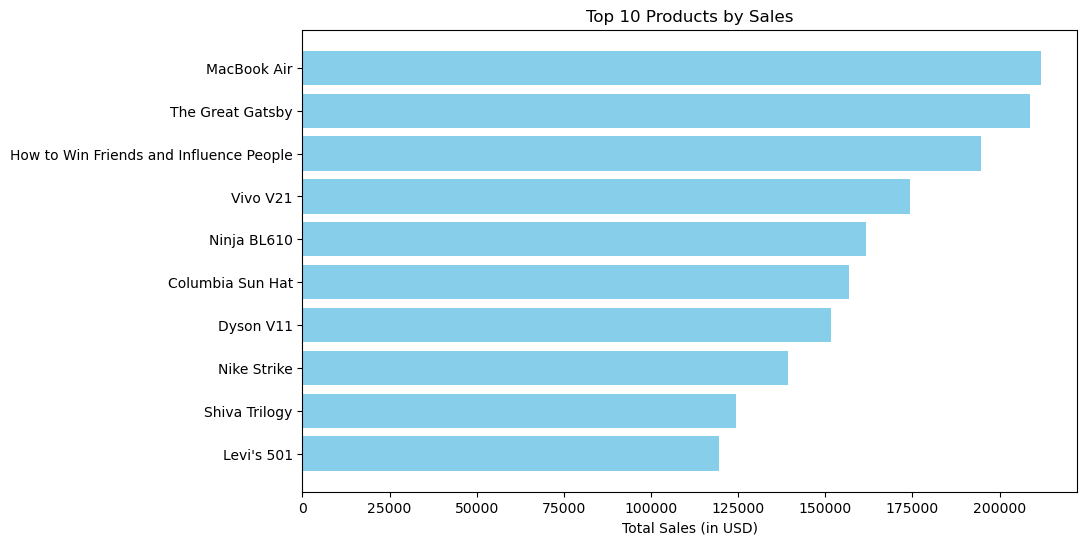

In [104]:
# Define SQL query to get top 10 products by sales
query = """
SELECT P.ProductName, SUM(OD.Quantity * OD.UnitPrice) AS TotalSales
FROM OrderDetails OD
JOIN Products P ON OD.ProductID = P.ProductID
GROUP BY P.ProductName
ORDER BY TotalSales DESC
LIMIT 10;
"""

# Execute the query and load results into a pandas DataFrame
top_products = pd.read_sql_query(query, connection)


# Display the DataFrame
print(top_products)

# Visualization using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_products['ProductName'], top_products['TotalSales'], color='skyblue')
plt.xlabel('Total Sales (in USD)')
plt.title('Top 10 Products by Sales')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()


**Insights :** The data highlights that the **MacBook Air** and **The Great Gatsby** are the top-selling items, generating over $200,000 each in total sales. Additionally, a diverse range of products, from electronics to literature and apparel, demonstrates strong consumer interest across various categories.

### Top 10 most frequent cutsomers by order count

  FirstName     LastName  OrderCount
0     Kiara       Taneja           9
1      Ojas    Chaudhuri           4
2    Dhanuk     Varghese           4
3     Kaira         Bath           3
4     Aarav         Ravi           3
5     Shray       Sahota           3
6    Mahika        Sidhu           3
7     Hunar       Dhawan           3
8     Romil  Ranganathan           3
9      Zara        Datta           2


/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/2236616895.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_customers = pd.read_sql_query(query, connection)


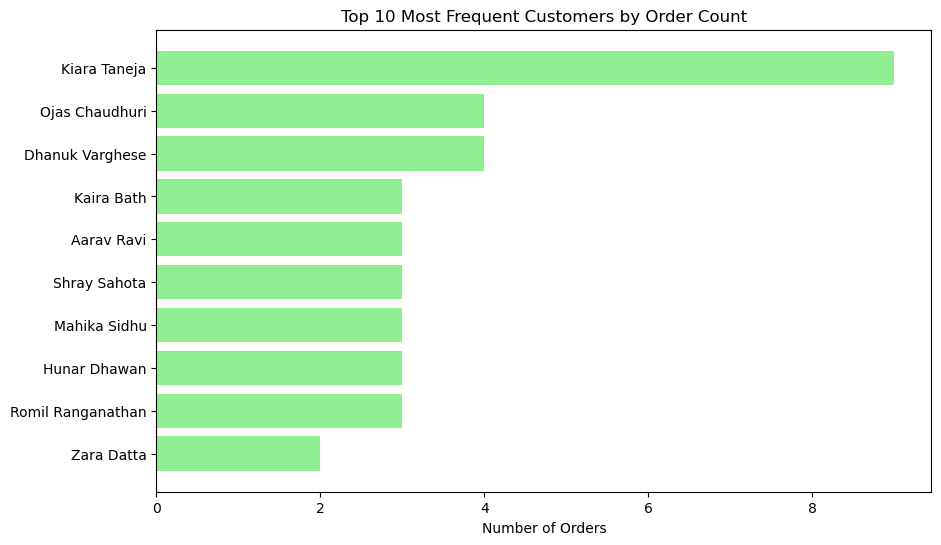

In [105]:
# SQL query to get the most frequent customers
query = """
SELECT C.FirstName, C.LastName, COUNT(O.OrderID) AS OrderCount
FROM Orders O
JOIN Customers C ON O.CustomerID = C.CustomerID
GROUP BY C.CustomerID
ORDER BY OrderCount DESC
LIMIT 10;
"""

# Execute the query and store the results in a pandas DataFrame
top_customers = pd.read_sql_query(query, connection)



# Display the DataFrame
print(top_customers)

# Visualization using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_customers['FirstName'] + " " + top_customers['LastName'], top_customers['OrderCount'], color='lightgreen')
plt.xlabel('Number of Orders')
plt.title('Top 10 Most Frequent Customers by Order Count')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()


**Insights :** Kiara Taneja stands out as the most frequent customer with **9 orders**. Meanwhile, several other customers, including Ojas Chaudhuri and Dhanuk Varghese, also show significant engagement, each placing 4 orders.

### Top 10 customers by revenue contribution

  FirstName     LastName  TotalRevenue
0    Dhanuk     Varghese       37267.0
1      Ojas    Chaudhuri       25875.0
2     Kiara       Taneja       22605.0
3    Mahika        Sidhu       17773.0
4  Parinaaz     Tripathi       17670.0
5     Romil  Ranganathan       16458.0
6     Aarav         Ravi       15780.0
7     Shray       Sahota       15498.0
8     Gatik        Saraf       14417.0
9    Jayesh      Maharaj       14189.0


/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/3809490422.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_customers_revenue = pd.read_sql_query(query, connection)


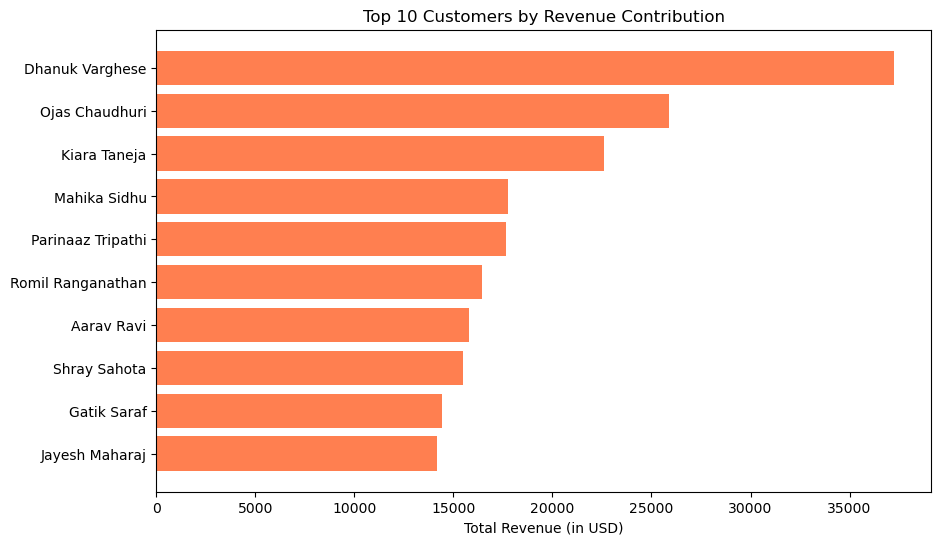

In [106]:
# SQL query to get the top 10 customers by revenue
query = """
SELECT C.FirstName, C.LastName, SUM(O.TotalAmount) AS TotalRevenue
FROM Orders O
JOIN Customers C ON O.CustomerID = C.CustomerID
GROUP BY C.CustomerID
ORDER BY TotalRevenue DESC
LIMIT 10;
"""

# Execute the query and store the results in a pandas DataFrame
top_customers_revenue = pd.read_sql_query(query, connection)



# Display the DataFrame
print(top_customers_revenue)

# Visualization using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_customers_revenue['FirstName'] + " " + top_customers_revenue['LastName'], top_customers_revenue['TotalRevenue'], color='coral')
plt.xlabel('Total Revenue (in USD)')
plt.title('Top 10 Customers by Revenue Contribution')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()


**Insights :** Dhanuk Varghese emerges as the top customer, contributing **$37,267** in total revenue.

### Top categories by sales

      CategoryName  TotalSales
0            Books    709270.0
1  Home Appliances    701528.0
2      Electronics    688107.0
3         Clothing    452534.0
4           Sports    348446.0


/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/4055367050.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_categories_sales = pd.read_sql_query(query, connection)


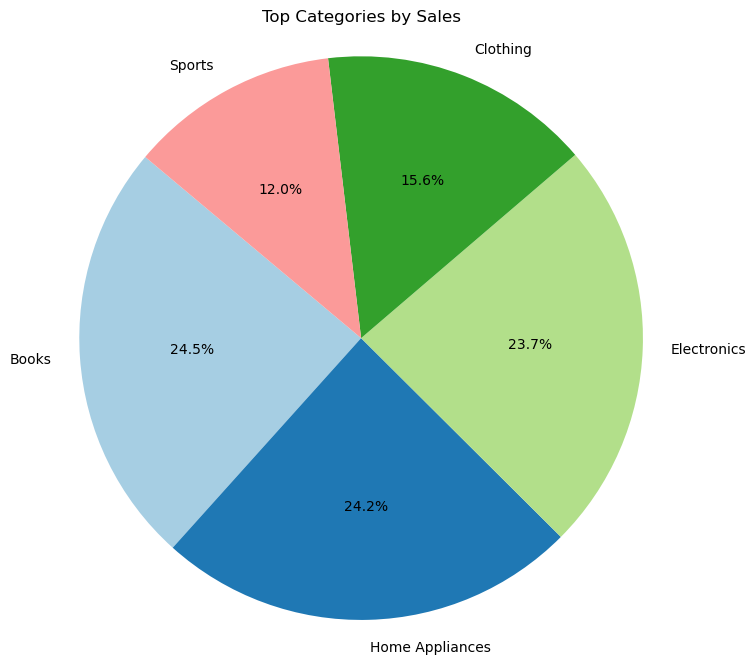

In [53]:
# SQL query to get the top categories by sales
query = """
SELECT C.CategoryName, SUM(OD.Quantity * OD.UnitPrice) AS TotalSales
FROM OrderDetails OD
JOIN Products P ON OD.ProductID = P.ProductID
JOIN Categories C ON P.CategoryID = C.CategoryID
GROUP BY C.CategoryName
ORDER BY TotalSales DESC;
"""

# Execute the query and store the results in a pandas DataFrame
top_categories_sales = pd.read_sql_query(query, connection)



# Display the DataFrame
print(top_categories_sales)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_categories_sales['TotalSales'], labels=top_categories_sales['CategoryName'], 
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Top Categories by Sales')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


**Insights :** Books and Home Appliances lead sales, respectively, indicating strong consumer demand in these categories. Additionally, Electronics and Clothing also show significant contributions, highlighting a diverse market interest across various product segments.

### Top 10 most popular products by order quantity

                               ProductName  TotalQuantityOrdered
0                              MacBook Air                  43.0
1                         The Great Gatsby                  40.0
2                                Dyson V11                  34.0
3  How to Win Friends and Influence People                  31.0
4                              Ninja BL610                  26.0
5                        Adidas Ultraboost                  26.0
6                                 Vivo V21                  26.0
7                         Columbia Sun Hat                  25.0
8                              Nike Strike                  20.0
9                           Wrogn Sneakers                  17.0


/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/2220873652.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  popular_products = pd.read_sql_query(query, connection)


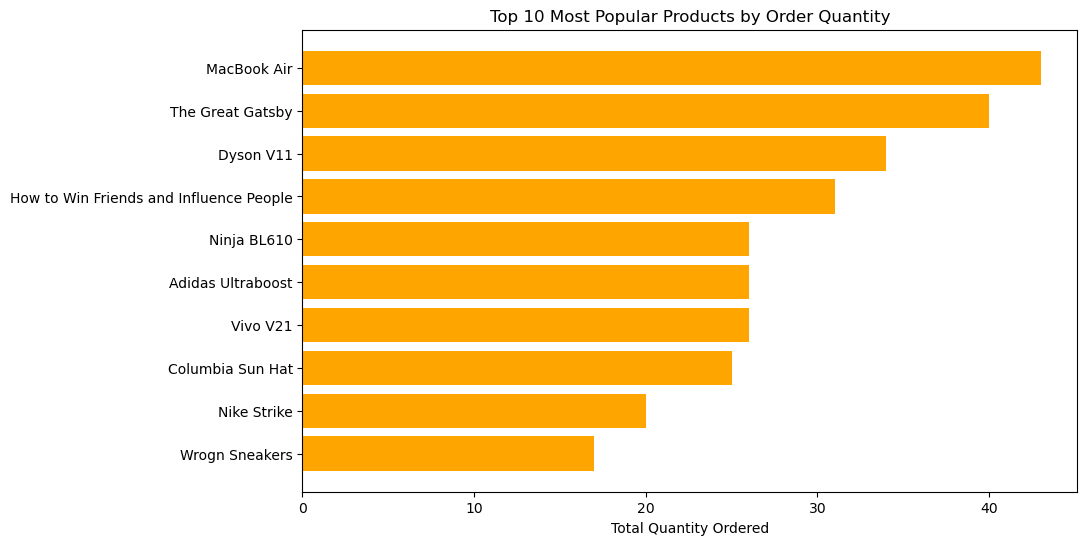

In [107]:
# SQL query to get the most popular products by order quantity
query = """
SELECT P.ProductName, SUM(OD.Quantity) AS TotalQuantityOrdered
FROM OrderDetails OD
JOIN Products P ON OD.ProductID = P.ProductID
GROUP BY P.ProductName
ORDER BY TotalQuantityOrdered DESC
LIMIT 10;
"""

# Execute the query and store the results in a pandas DataFrame
popular_products = pd.read_sql_query(query, connection)


# Display the DataFrame
print(popular_products)

# Visualization using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(popular_products['ProductName'], popular_products['TotalQuantityOrdered'], color='orange')
plt.xlabel('Total Quantity Ordered')
plt.title('Top 10 Most Popular Products by Order Quantity')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()


**Insights :** The **MacBook Air** tops the list with **43 units ordered**, showcasing its popularity among consumers. Additionally, titles like **The Great Gatsby** and products such as the **Dyson V11** demonstrate strong demand, indicating diverse interests in both technology and literature.

### Total revenue generated per product

                                  ProductName  TotalRevenue
0                                 MacBook Air      211761.0
1                            The Great Gatsby      208634.0
2     How to Win Friends and Influence People      194537.0
3                                    Vivo V21      174228.0
4                                 Ninja BL610      161731.0
5                            Columbia Sun Hat      156934.0
6                                   Dyson V11      151509.0
7                                 Nike Strike      139324.0
8                               Shiva Trilogy      124330.0
9                                  Levi's 501      119524.0
10                          Adidas Ultraboost      118150.0
11                         Decathlon Yoga Mat      118081.0
12                             Philips AC2887      110816.0
13                        Samsung RF28R7351SG       99533.0
14                       Lonely Planet: India       98610.0
15                      Preethi Mixer Gr

/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/3689777716.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_revenue = pd.read_sql_query(query, connection)


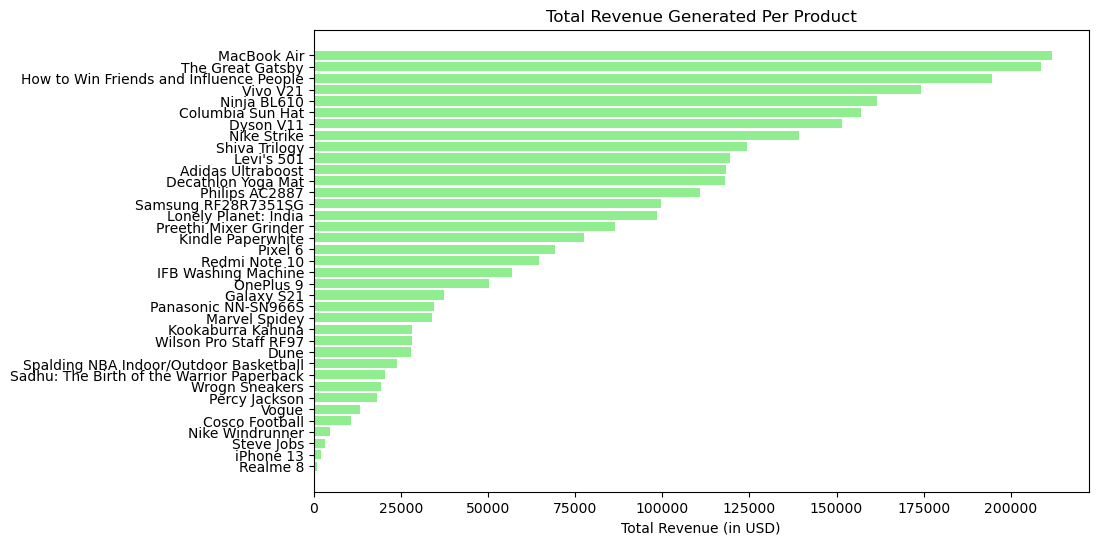

In [108]:
# SQL query to calculate total revenue generated per product
query = """
SELECT P.ProductName, SUM(OD.Quantity * OD.UnitPrice) AS TotalRevenue
FROM OrderDetails OD
JOIN Products P ON OD.ProductID = P.ProductID
GROUP BY P.ProductName
ORDER BY TotalRevenue DESC;
"""

# Execute the query and store the results in a pandas DataFrame
product_revenue = pd.read_sql_query(query, connection)



# Display the DataFrame
print(product_revenue)

# Visualization using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(product_revenue['ProductName'], product_revenue['TotalRevenue'], color='lightgreen')
plt.xlabel('Total Revenue (in USD)')
plt.title('Total Revenue Generated Per Product')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.show()


**Insights :** The **MacBook Air** and **The Great Gatsby** lead revenue generation respectively, reflecting strong consumer interest in both technology and literature. Additionally, a diverse array of products, from electronics to apparel, shows significant sales, indicating a well-rounded market appeal.

### Total revenue generated per product category

      CategoryName  TotalRevenue
0            Books      709270.0
1  Home Appliances      701528.0
2      Electronics      688107.0
3         Clothing      452534.0
4           Sports      348446.0


/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/2457813288.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_revenue = pd.read_sql_query(query, connection)


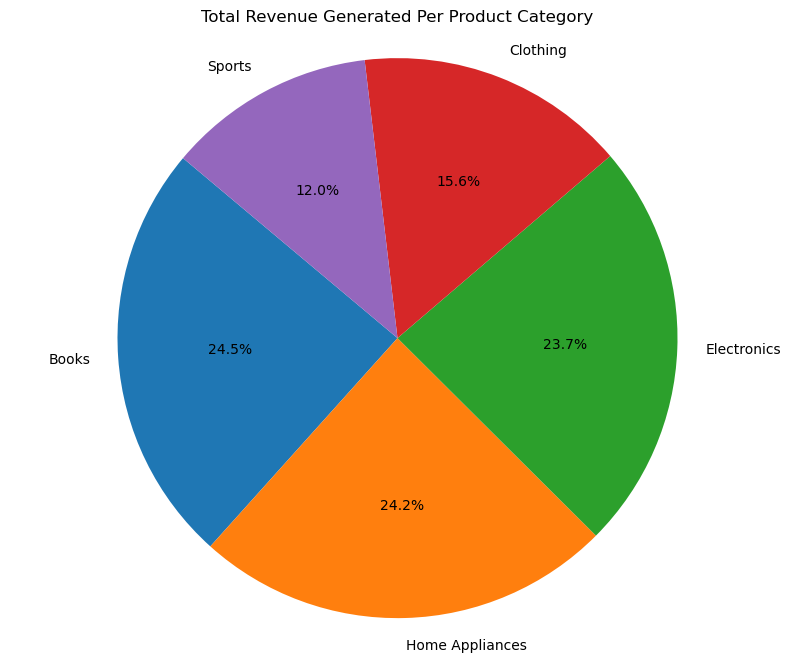

In [109]:
# SQL query to calculate total revenue per category
query = """
SELECT C.CategoryName, SUM(OD.Quantity * OD.UnitPrice) AS TotalRevenue
FROM OrderDetails OD
JOIN Products P ON OD.ProductID = P.ProductID
JOIN Categories C ON P.CategoryID = C.CategoryID
GROUP BY C.CategoryName
ORDER BY TotalRevenue DESC;
"""

# Execute the query and store the results in a pandas DataFrame
category_revenue = pd.read_sql_query(query, connection)


# Display the DataFrame
print(category_revenue)

# Visualization using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(category_revenue['TotalRevenue'], labels=category_revenue['CategoryName'], autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue Generated Per Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


**Insights :** Books and Home Appliances are the top revenue-generating categories, with total sales of, respectively, highlighting strong consumer demand in these sectors. Additionally, the Electronics and Clothing categories also contribute significantly, indicating a diverse interest among buyers.

### Inventory status by category 

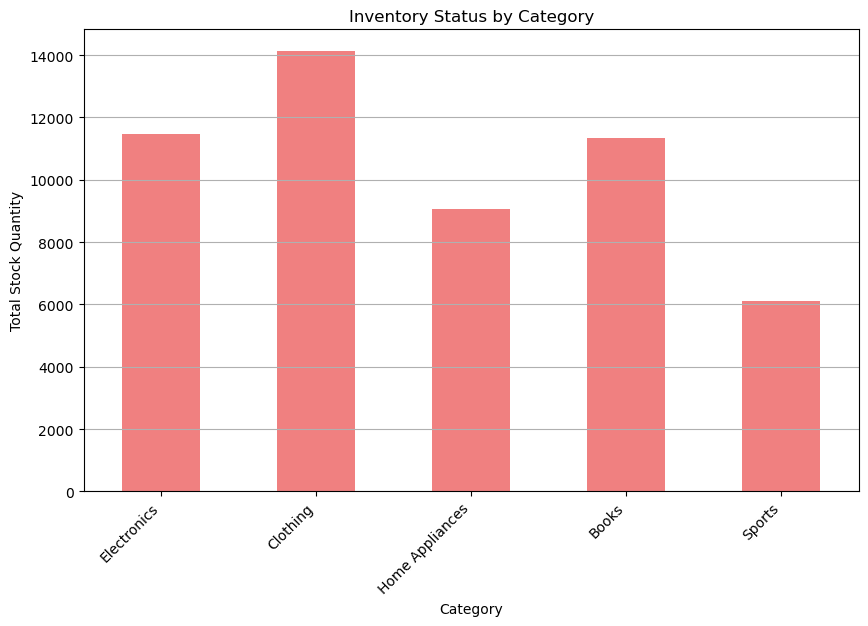

In [112]:
# Grouping by category and summing up stock quantity
category_inventory = products.groupby('CategoryID')['StockQuantity'].sum()

# Mapping category IDs to category names
category_inventory.index = category_inventory.index.map(categories.set_index('CategoryID')['CategoryName'])

# Plotting
plt.figure(figsize=(10, 6))
category_inventory.plot(kind='bar', color='lightcoral')
plt.title('Inventory Status by Category')
plt.xlabel('Category')
plt.ylabel('Total Stock Quantity')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-labels
plt.grid(axis='y')
plt.show()

**Insights :** Clothing category's stock leads the stock quantity and the soprts category's stock is less among all the product's category.

### Average order value by product category

/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/1132404675.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_order_value_df = pd.read_sql(query_avg_order_value, connection)


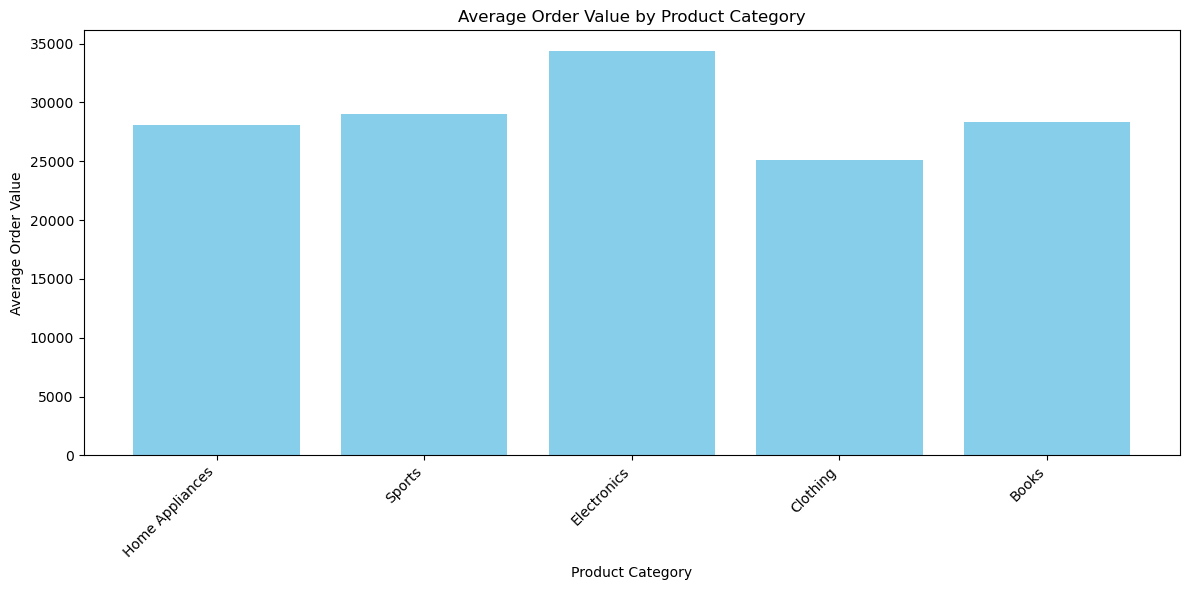

In [113]:
# SQL query to retrieve average order value by product category
query_avg_order_value = """
SELECT c.CategoryName, AVG(od.Quantity * od.UnitPrice) as AvgOrderValue
FROM categories c
JOIN products p ON c.CategoryID = p.CategoryID
JOIN orderdetails od ON p.ProductID = od.ProductID
GROUP BY c.CategoryName
"""

# Read data from MySQL into a DataFrame
avg_order_value_df = pd.read_sql(query_avg_order_value, connection)

# Plot average order value by product category
plt.figure(figsize=(12, 6))
plt.bar(avg_order_value_df['CategoryName'], avg_order_value_df['AvgOrderValue'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Insights :** Average order value of elctronics category is higher and clothing category  is less.

### Total sales per month

/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/4208525762.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


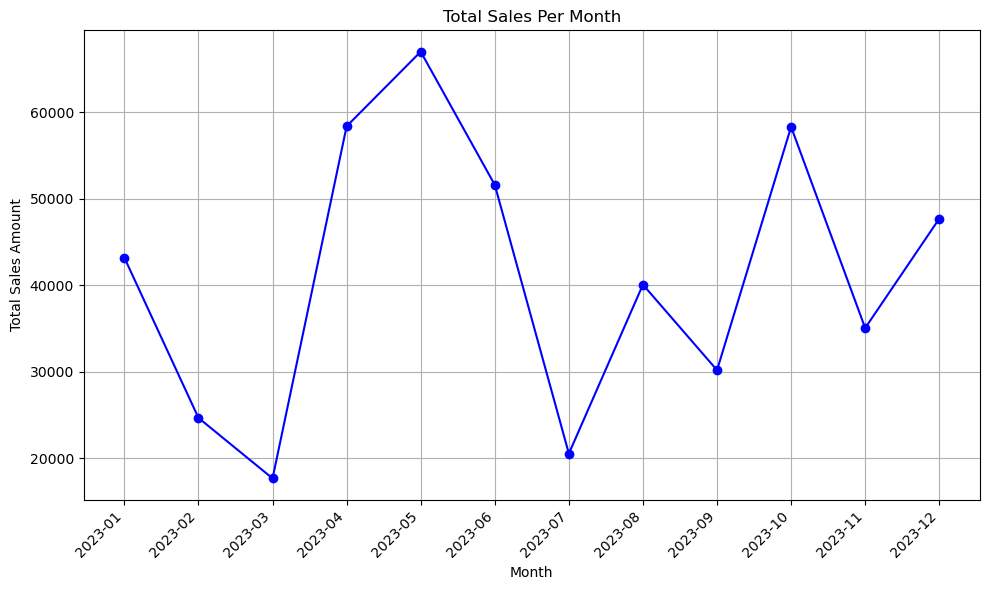

In [114]:
# Query to fetch total sales per month
query = """
SELECT DATE_FORMAT(OrderDate, '%Y-%m') AS Month, SUM(TotalAmount) AS TotalSales
FROM Orders
GROUP BY Month
ORDER BY Month
"""

# Load data into a DataFrame
df = pd.read_sql(query, connection)

# Plot the total sales per month as a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['TotalSales'], marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Per Month')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


**Insights :** The highest sales is in a month of May and lowest sales is in a month of March.

### Total sales by supplier

/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/728906382.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


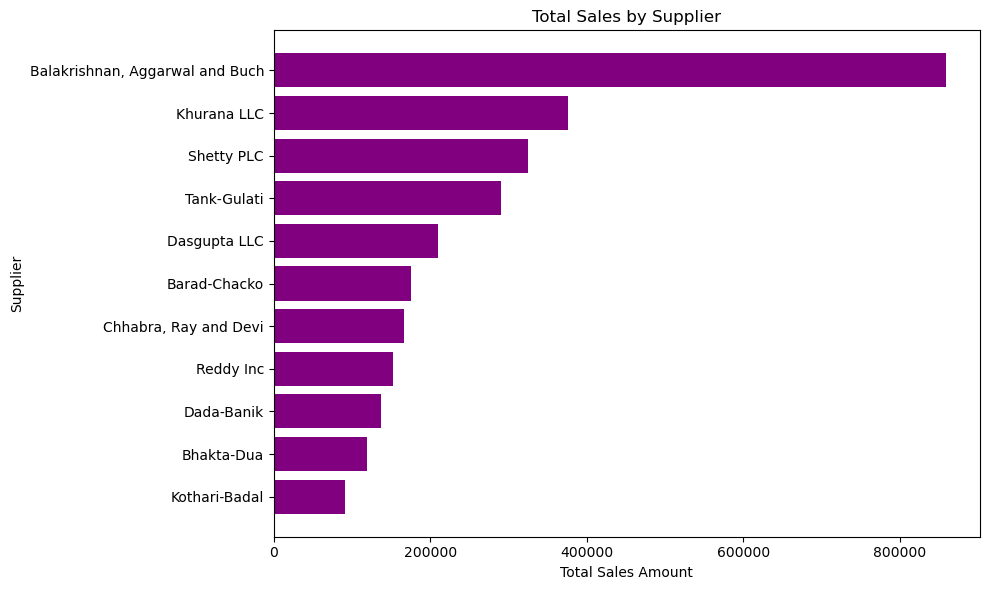

In [118]:
# Query to fetch total sales by supplier
query = """
SELECT s.SupplierName, SUM(od.TotalPrice) AS TotalSales
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY s.SupplierName
ORDER BY TotalSales DESC
"""

# Load data into a DataFrame
df = pd.read_sql(query, connection)

# Plot the total sales by supplier as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['SupplierName'], df['TotalSales'], color='purple')
plt.xlabel('Total Sales Amount')
plt.ylabel('Supplier')
plt.title('Total Sales by Supplier')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


**Insights :** Balakrishnan, Aggarwal and Buch supplier has the most sales amount followed by Khurana LLC.

### Suppliers Supplying the most orders

/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/2042804373.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


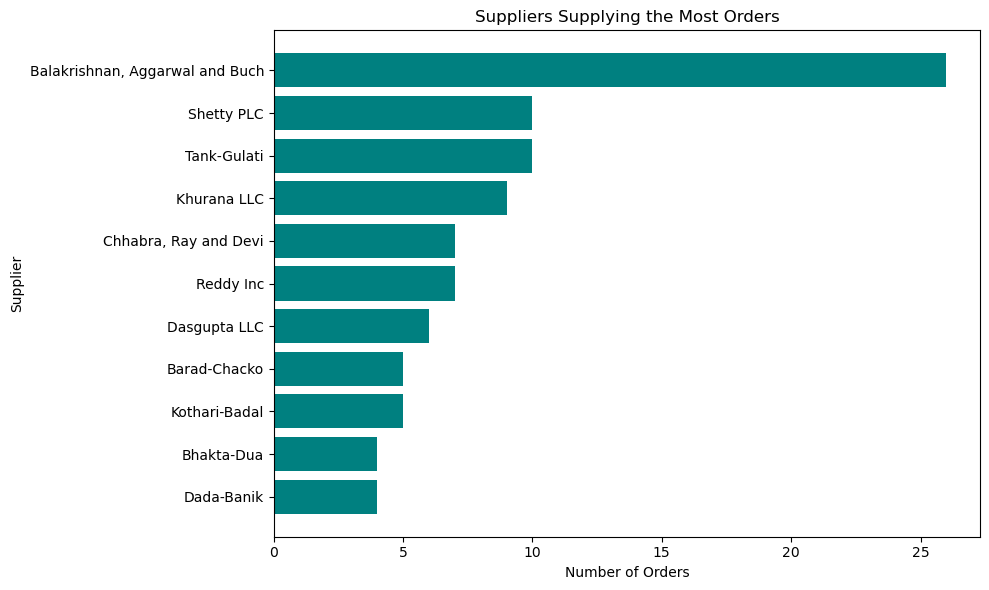

In [119]:
# Query to fetch the number of orders by supplier
query = """
SELECT s.SupplierName, COUNT(DISTINCT od.OrderID) AS OrderCount
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY s.SupplierName
ORDER BY OrderCount DESC
"""

# Load data into a DataFrame
df = pd.read_sql(query, connection)

# Plot the number of orders by supplier as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['SupplierName'], df['OrderCount'], color='teal')
plt.xlabel('Number of Orders')
plt.ylabel('Supplier')
plt.title('Suppliers Supplying the Most Orders')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()


**Insights :** Balakrishnan, Aggarwal and Buch supplier has supplied the most of the order followed by Shetty PLc.

### Distribution of Delivery time

Average Delivery Time (in days): 4.78


/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_937/486162603.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  delivery_time_df = pd.read_sql(query_delivery_time, connection)


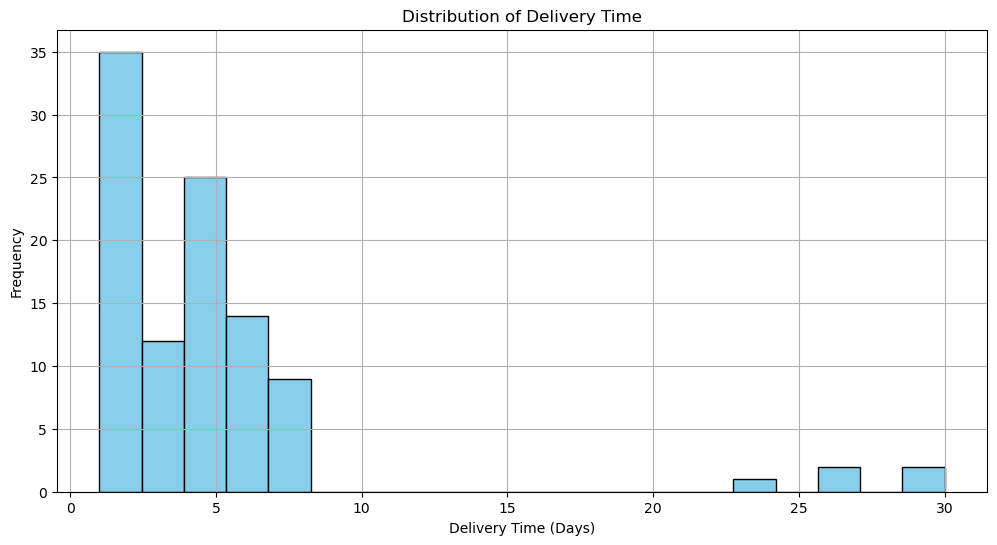

In [7]:
# SQL query to retrieve order placement and delivery timestamps
query_delivery_time = """
SELECT OrderID, TIMESTAMPDIFF(DAY, OrderDate, ShippingDate
) as DeliveryTime
FROM orders
"""

# Read data from MySQL into a DataFrame
delivery_time_df = pd.read_sql(query_delivery_time, connection)

# Calculate average delivery time
average_delivery_time = delivery_time_df['DeliveryTime'].mean()

# Print the average delivery time
print("Average Delivery Time (in days):", average_delivery_time)

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(delivery_time_df['DeliveryTime'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Time')
plt.grid(True)
plt.show()


**Insights :** Average delivery time (in days) is 4.78 days.

### Customer segmentation based on total spending

/var/folders/rp/65txbxrd1ygblm7bxhb9y7br0000gn/T/ipykernel_964/3453288030.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


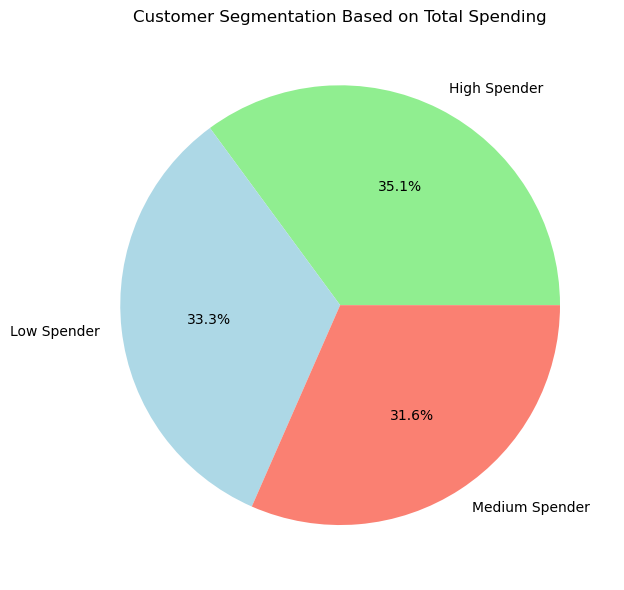

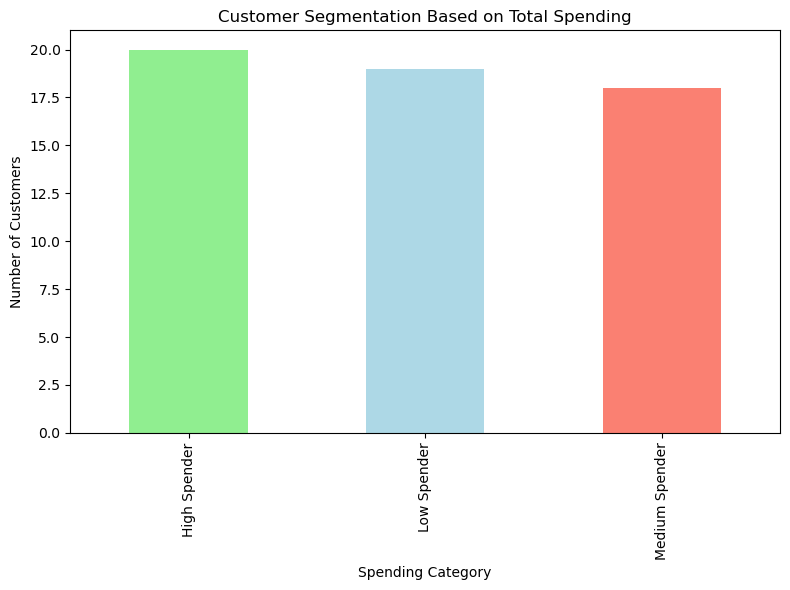

In [125]:
# Query to calculate total spending for each customer
query = """
SELECT c.CustomerID, CONCAT(c.FirstName, ' ', c.LastName) AS CustomerName, SUM(o.TotalAmount) AS TotalSpending
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
GROUP BY c.CustomerID
ORDER BY TotalSpending DESC
"""

# Load data into a DataFrame
df = pd.read_sql(query, connection)

# Define spending categories (Low, Medium, High) based on percentiles
bins = [0, df['TotalSpending'].quantile(0.33), df['TotalSpending'].quantile(0.66), df['TotalSpending'].max()]
labels = ['Low Spender', 'Medium Spender', 'High Spender']
df['SpendingCategory'] = pd.cut(df['TotalSpending'], bins=bins, labels=labels, include_lowest=True)

# Count customers in each segment
segment_counts = df['SpendingCategory'].value_counts()

# Close the connection
connection.close()


# Plot the customer segmentation (Pie Chart)
plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon'])
plt.title('Customer Segmentation Based on Total Spending')
plt.tight_layout()
plt.show()

# Optionally, you can also plot a bar chart for better readability
plt.figure(figsize=(8, 6))
segment_counts.plot(kind='bar', color=['lightgreen', 'lightblue', 'salmon'])
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation Based on Total Spending')
plt.tight_layout()
plt.show()


**Insights :** High spender are more followed by low spender followed by medium spender.

# Conclusion

This project successfully highlights the power of data visualization in uncovering valuable insights from inventory data. The visualizations reveal significant sales trends, product performance metrics, and supplier contributions, offering a clear and actionable understanding of the inventory landscape. These findings can help businesses enhance their inventory management practices, strengthen supplier partnerships, and refine their sales strategies, leading to improved efficiency and profitability.

- The data highlights that the **MacBook Air** and **The Great Gatsby** are the top-selling items.

- Kiara Taneja stands out as the most frequent customer with **9 orders**. Meanwhile, several other customers, including Ojas Chaudhuri and Dhanuk Varghese, also show significant engagement, each placing 4 orders.

- Dhanuk Varghese emerges as the top customer, contributing **$37,267** in total revenue.

- Books and Home Appliances lead sales, respectively, indicating strong consumer demand in these categories. Additionally, Electronics and Clothing also show significant contributions, highlighting a diverse market interest across various product segments.

- Books and Home Appliances are the top revenue-generating categories, with total sales of, respectively, highlighting strong consumer demand in these sectors.

- Average order value of elctronics category is higher.

- The highest sales is in a month of May and lowest sales is in a month of March.

- Average Delivery Time (in days): 4.78

# Recommendations

### Recommendations for Enhancing an Inventory Analysis Project

#### 1. **Customer-Centric Inventory Management**
   - **Real-Time Inventory Tracking**: Implement technology that provides real-time tracking of inventory levels. This enables customers to view product availability instantly, reducing the likelihood of stockouts and improving customer satisfaction.
   - **Automated Reordering**: Utilize predictive analytics to forecast inventory needs based on historical sales data. Implement automated reordering systems to ensure popular items are always in stock, helping to meet customer demand promptly.
   - **Customer Insights**: Analyze purchasing patterns and trends to understand customer preferences. This can help tailor inventory management strategies, ensuring that the right products are available at the right time.

#### 2. **Integration of Advanced Technologies**
   - **Cloud-Based Solutions**: Transition to cloud-based inventory management systems to enhance accessibility and collaboration. This allows for centralized data storage and access from multiple locations, improving decision-making across teams.
   - **Artificial Intelligence (AI)**: Leverage AI for demand forecasting and inventory optimization. Machine learning algorithms can analyze past sales data, seasonality, and market trends to predict future demand more accurately, enabling more informed inventory decisions.
   - **Internet of Things (IoT)**: Utilize IoT devices, such as smart shelves and RFID tags, to monitor inventory levels automatically. This can reduce manual tracking errors and provide accurate, up-to-date information about stock levels and locations.
   - **Blockchain Technology**: Implement blockchain for enhanced transparency and traceability in the supply chain. This can help verify the authenticity of products and streamline logistics, ensuring customers receive quality products.

#### 3. **Enhanced Reporting and Analytics**
   - **Dynamic Dashboards**: Develop user-friendly dashboards that visualize inventory metrics, such as turnover rates, stock levels, and sales trends. This can empower stakeholders to make data-driven decisions and identify areas for improvement quickly.
   - **Custom Reporting Tools**: Create customizable reporting tools that allow customers to generate reports on specific inventory metrics, helping them analyze performance according to their unique business needs.

#### 4. **Improving Customer Experience**
   - **Personalized Recommendations**: Use customer data to provide personalized product recommendations based on purchase history and preferences. This can enhance customer engagement and increase sales.
   - **Seamless Omnichannel Experience**: Ensure a consistent inventory experience across all sales channels (online, in-store, etc.). This allows customers to check product availability, order online, and pick up in-store or have items shipped, enhancing convenience and satisfaction.

#### 5. **Training and Support**
   - **User Training Programs**: Offer comprehensive training sessions for customers on how to use the inventory management system effectively. This ensures they can leverage all features, improving overall satisfaction with the technology.
   - **24/7 Customer Support**: Implement a robust support system to assist customers with inventory inquiries, issues, or system navigation. This fosters trust and encourages customer loyalty.

#### 6. **Feedback and Continuous Improvement**
   - **Customer Feedback Mechanism**: Establish a feedback loop where customers can share their experiences with the inventory system. Use this feedback to identify pain points and areas for improvement, fostering a customer-centric approach to inventory management.
   - **Iterative Updates**: Continuously update the technology and processes based on customer needs and industry trends. This ensures that the inventory system remains relevant and effective.